## Load data and manipulate

In [1]:
#Installing packages
library(caret)
library(kernlab)
library(ellipse)
library(randomForest)


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha



Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [2]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")
dataset$Species = as.factor(dataset$Species)

In [3]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

In [4]:
# dimensions of dataset
dim(dataset)

[1] 120   5

In [5]:
# list types for each attribute
sapply(dataset, class)


Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [6]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa


In [7]:


# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)


,freq,percentage
Iris-setosa,40,33.33333
Iris-versicolor,40,33.33333
Iris-virginica,40,33.33333


In [8]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.10  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.30  
 Median :5.800   Median :3.000   Median :4.250   Median :1.30  
 Mean   :5.808   Mean   :3.031   Mean   :3.742   Mean   :1.19  
 3rd Qu.:6.325   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80  
 Max.   :7.900   Max.   :4.200   Max.   :6.900   Max.   :2.50  
            Species  
 Iris-setosa    :40  
 Iris-versicolor:40  
 Iris-virginica :40  
                     
                     
                     

## Plotting the data


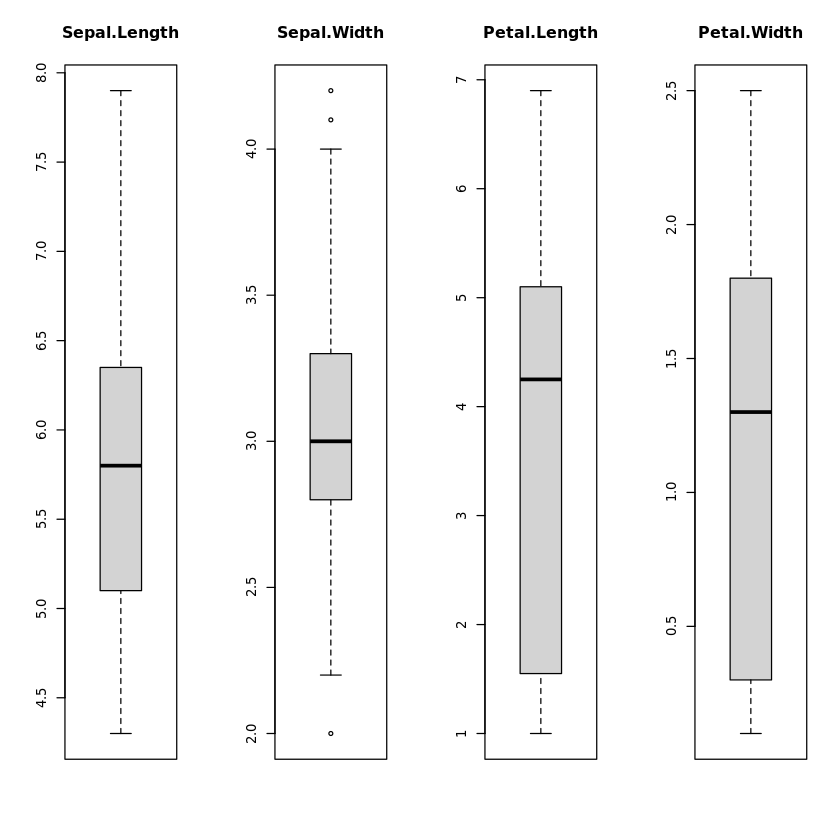

In [9]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}


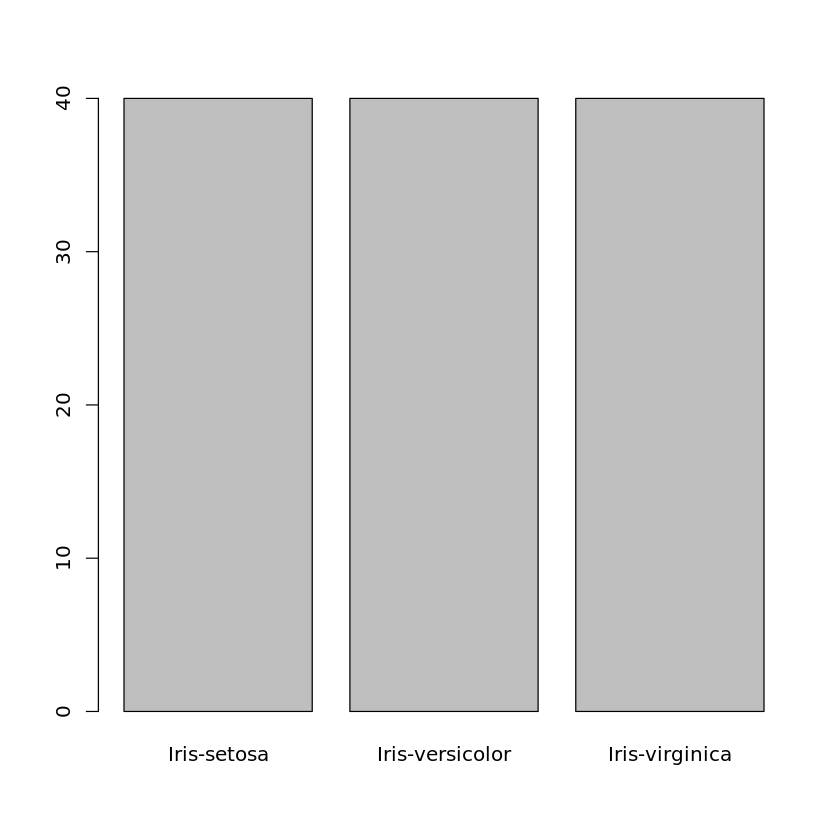

In [10]:
# barplot for class breakdown

plot(y)
#species_count = table(dataset$Species)
#df <- data.frame(species = names(species_count), frequency = as.numeric(species_count))
#barplot(df$frequency, names.arg = df$species)

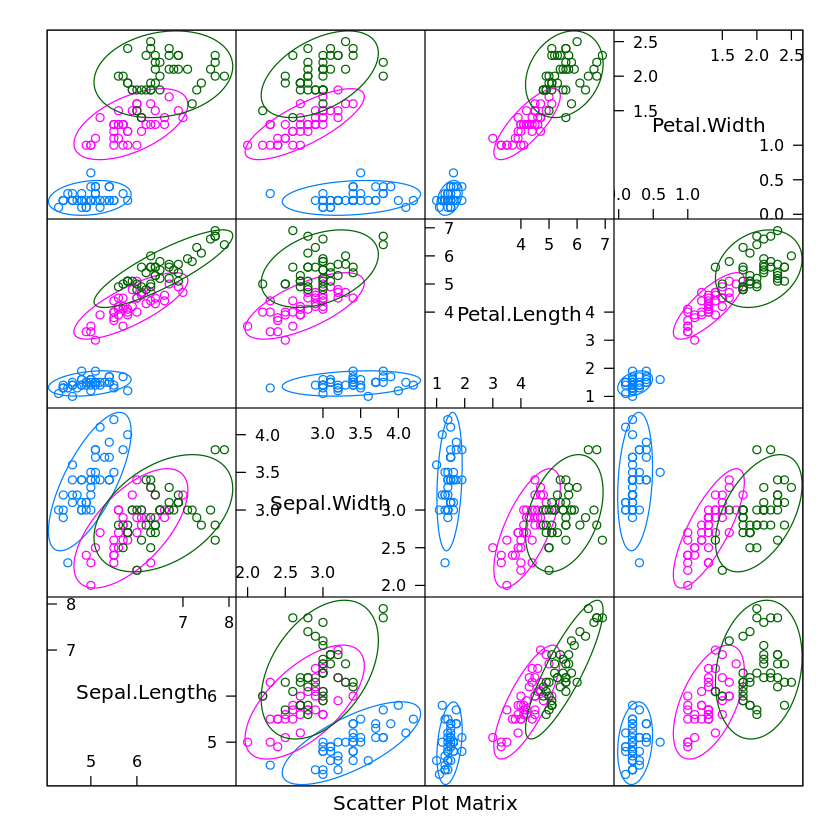

In [11]:
# scatterplot matrix

featurePlot(x=x, y=y, plot="ellipse")


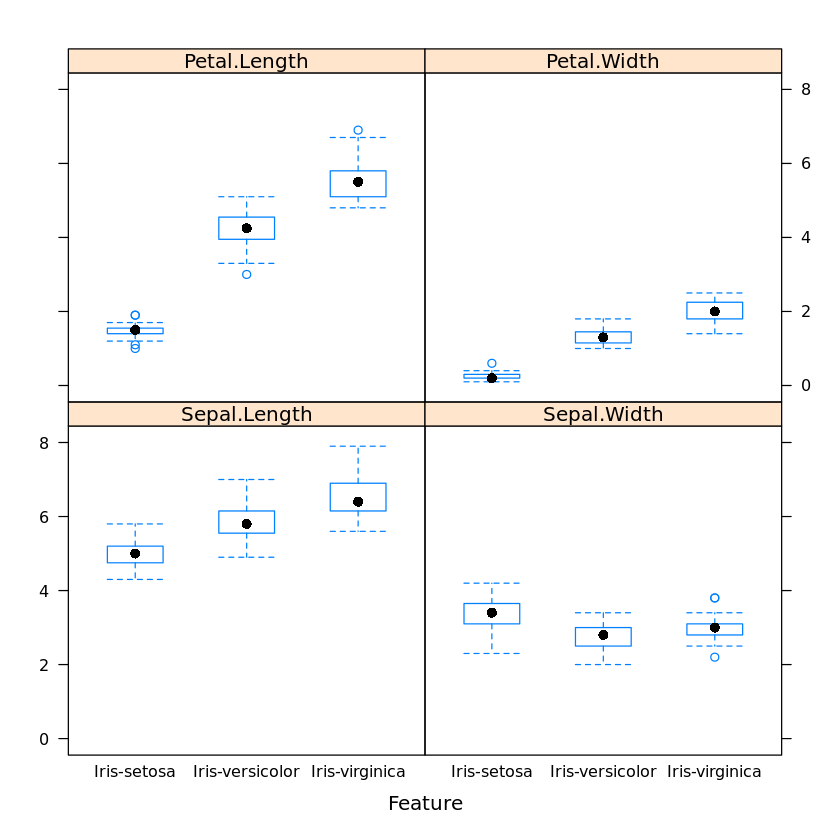

In [12]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

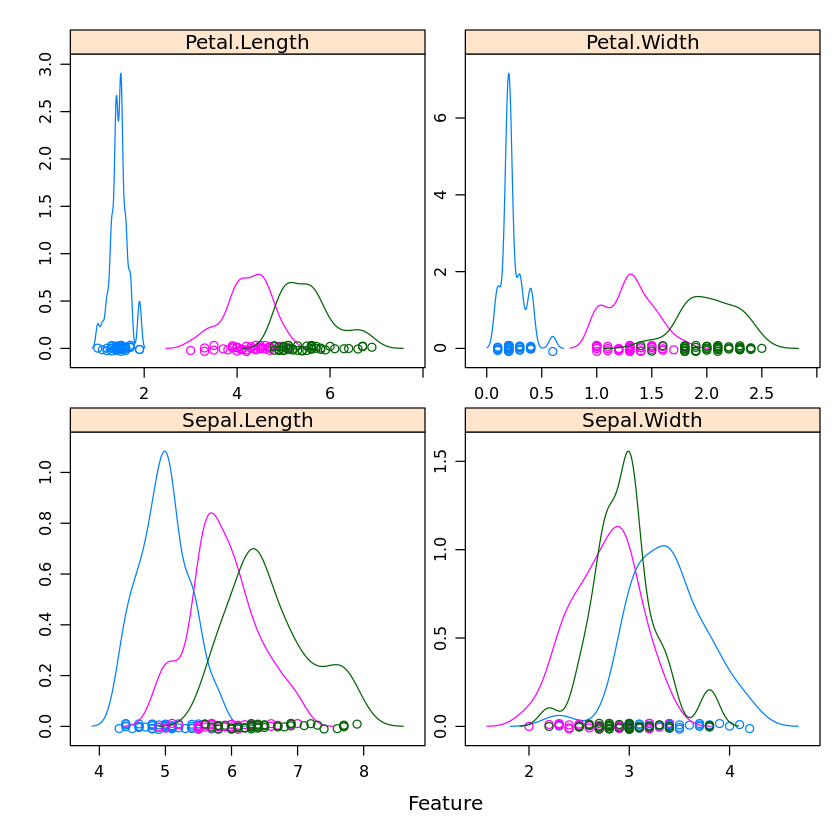

In [13]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

## Evaluate Algorythms

In [14]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [15]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [16]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.8333333 0.9375000 1.0000000 0.9666667       1    1    0
cart 0.8333333 0.9166667 0.9583333 0.9416667       1    1    0
knn  0.9166667 1.0000000 1.0000000 0.9833333       1    1    0
svm  0.9166667 0.9166667 1.0000000 0.9666667       1    1    0
rf   0.9166667 0.9166667 1.0000000 0.9666667       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.750 0.90625 1.0000 0.9500       1    1    0
cart 0.750 0.87500 0.9375 0.9125       1    1    0
knn  0.875 1.00000 1.0000 0.9750       1    1    0
svm  0.875 0.87500 1.0000 0.9500       1    1    0
rf   0.875 0.87500 1.0000 0.9500       1    1    0


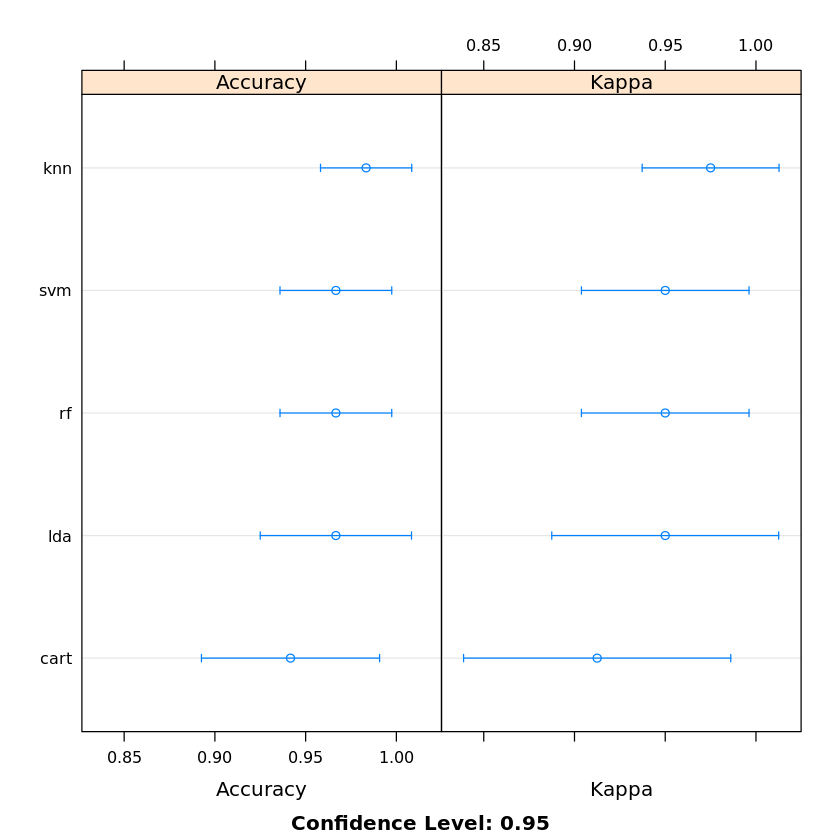

In [17]:
# compare accuracy of models
dotplot(results)
 


In [18]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9666667  0.95 



## Predictions